In [1]:
%tensorflow_version 1.x
#import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LSTM, Reshape, Input, Concatenate, ZeroPadding2D, GlobalMaxPool2D
from keras.models import Model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters  as iaa
import cv2
import ntpath
import random

TensorFlow 1.x selected.


Using TensorFlow backend.


In [2]:
WIDTH = 160
HEIGHT = 120

In [3]:
#Load Data from Google Drive
from google.colab import drive
train_data1 = np.load('drive/My Drive/training_data_angle/training_data-1.npy', allow_pickle=True)
train_data2 = np.load('drive/My Drive/training_data_angle/training_data-2.npy', allow_pickle=True)
train_data3 = np.load('drive/My Drive/training_data_angle/training_data-3.npy', allow_pickle=True)
train_data4 = np.load('drive/My Drive/training_data_angle/training_data-4.npy', allow_pickle=True)
train_data5 = np.load('drive/My Drive/training_data_angle/training_data-5.npy', allow_pickle=True)
train_data6 = np.load('drive/My Drive/training_data_angle/training_data-6.npy', allow_pickle=True)
train_data7 = np.load('drive/My Drive/training_data_angle/training_data-7.npy', allow_pickle=True)
train_data8 = np.load('drive/My Drive/training_data_angle/training_data-8.npy', allow_pickle=True)
train_data9 = np.load('drive/My Drive/training_data_angle/training_data-9.npy', allow_pickle=True)
train_data10 = np.load('drive/My Drive/training_data_angle/training_data-10.npy', allow_pickle=True)
train_data11 = np.load('drive/My Drive/training_data_angle/training_data-11.npy', allow_pickle=True)
train_data12 = np.load('drive/My Drive/training_data_angle/training_data-12.npy', allow_pickle=True)
train_data13 = np.load('drive/My Drive/training_data_angle/training_data-13.npy', allow_pickle=True)
train_data14 = np.load('drive/My Drive/training_data_angle/training_data-14.npy', allow_pickle=True)
train_data15 = np.load('drive/My Drive/training_data_angle/training_data-15.npy', allow_pickle=True)
train_data16 = np.load('drive/My Drive/training_data_angle/training_data-16.npy', allow_pickle=True)
train_data17 = np.load('drive/My Drive/training_data_angle/training_data-17.npy', allow_pickle=True)
train_data18 = np.load('drive/My Drive/training_data_angle/training_data-18.npy', allow_pickle=True)
train_data19 = np.load('drive/My Drive/training_data_angle/training_data-19.npy', allow_pickle=True)
train_data20 = np.load('drive/My Drive/training_data_angle/training_data-20.npy', allow_pickle=True)
train_data21 = np.load('drive/My Drive/training_data_angle/training_data-21.npy', allow_pickle=True)
train_data22 = np.load('drive/My Drive/training_data_angle/training_data-22.npy', allow_pickle=True)
train_data23 = np.load('drive/My Drive/training_data_angle/training_data-23.npy', allow_pickle=True)
train_data24 = np.load('drive/My Drive/training_data_angle/training_data-24.npy', allow_pickle=True)
train_data25 = np.load('drive/My Drive/training_data_angle/training_data-25.npy', allow_pickle=True)


train_data =  np.concatenate((train_data1, train_data2, train_data3, train_data4, train_data5, train_data6, train_data7,
                             train_data8, train_data9, train_data10, train_data11, train_data12, train_data13, train_data14,
                             train_data15, train_data16, train_data17, train_data18, train_data19, train_data20, train_data21,
                             train_data22, train_data23, train_data24, train_data25))

print ("Train Data: ", train_data.shape)


Train Data:  (100000, 2)


In [4]:
#clear the array
train_data1 = []
train_data2 = []
train_data3 = []
train_data4 = []
train_data5 = []
train_data6 = []
train_data7 = []
train_data8 = []
train_data9 = []
train_data10 = []
train_data11 = []
train_data12 = []
train_data13 = []
train_data14 = []
train_data15 = []
train_data16 = []
train_data17 = []
train_data18 = []
train_data19 = []
train_data20 = []
train_data21 = []

In [5]:
#seperate data into steering and throttle 
steering = []
throttle = []
for data in train_data:
  image = data [0]
  steering_data = data [1][0]
  throttle_data = data [1][1]
  
  choice = [steering_data, throttle]
  steering.append(steering_data)
  throttle.append(throttle_data)

steering = np.array(steering)
throttle = np.array(throttle)

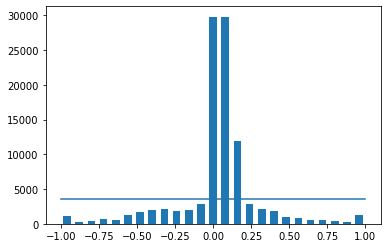

In [6]:
#Plot Unbalanced Steering Data
num_bins = 25
samples_per_bin = 3500
hist, bins = np.histogram(steering, num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)
plt.plot((np.min(steering), np.max(steering)), (samples_per_bin, samples_per_bin))

<BarContainer object of 25 artists>

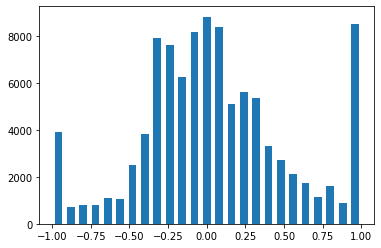

In [7]:
#Plot Unbalanced throttle Data
num_bins = 25
samples_per_bin = 3500
hist, bins = np.histogram(throttle, num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)
#plt.plot((np.min(steering), np.max(steering)), (samples_per_bin, samples_per_bin))

In [8]:
#Balance the steering data
print ('total data', len(train_data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(steering)):
    if steering[i] >= bins[j] and steering[i]<=bins[j+1]:
      #print(i)
      list_.append(i) 
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print ('removed', len(remove_list))

print (np.max(remove_list))

train_data = np.delete(train_data, remove_list, axis=0)

print ('remaining:', len (train_data))

total data 100000
removed 60954
99996
remaining: 39046


In [9]:
#seperate balanced data into steering and throttle 
steering = []
throttle = []

for data in train_data:
  image = data [0]
  steering_data = data [1][0]
  throttle_data = data [1][1]
  steering.append(steering_data)
  throttle.append(throttle_data)

steering = np.array(steering)
throttle = np.array(throttle)

<BarContainer object of 25 artists>

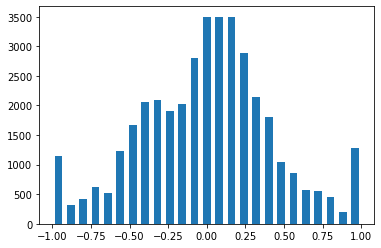

In [10]:
#Plot balanced Steering Data
num_bins = 25
samples_per_bin = 2000
hist, bins = np.histogram(steering, num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)
#plt.plot((np.min(steering), np.max(steering)), (samples_per_bin, samples_per_bin))

<BarContainer object of 25 artists>

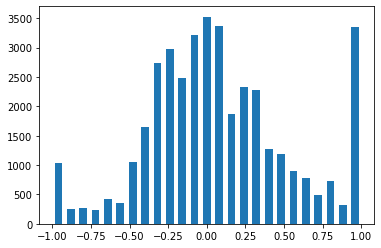

In [11]:
#Plot balanced throttle Data
num_bins = 25
samples_per_bin = 2000
hist, bins = np.histogram(throttle, num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)
#plt.plot((np.min(steering), np.max(steering)), (samples_per_bin, samples_per_bin))

In [12]:
#function to flip the image and steering angle
def img_random_flip(image, choice):
  image = cv2.flip(image, 1)
  steering=choice[0]
  throttle=choice[1]
  steering = -steering
  new_choice = [steering, throttle]
  return image, new_choice


In [13]:
#add augmented data to the dataset
temp_train_data = []
for data in train_data:
  image = data [0]
  choice = data [1]
  flipped_image, flipped_choice = img_random_flip(image, choice)
  temp_train_data.append([flipped_image, flipped_choice])

temp_train_data =np.array(temp_train_data)
train_data = np.concatenate((train_data,temp_train_data))


print ("New Size of Training Data:", len(train_data))
train_data = shuffle(train_data)


New Size of Training Data: 78092


In [14]:
#seperate artificially expanded data into steering and throttle 
train_data = shuffle(train_data)
steering = []
throttle = []

for data in train_data:
  image = data [0]
  steering_data = data [1][0]
  throttle_data = data [1][1]
  steering.append(steering_data)
  throttle.append(throttle_data)

steering = np.array(steering)
throttle = np.array(throttle)

<BarContainer object of 25 artists>

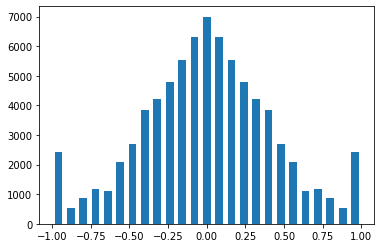

In [15]:
#Plot expanded-balanced Steering Data
num_bins = 25
samples_per_bin = 2000
hist, bins = np.histogram(steering, num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)
#plt.plot((np.min(steering), np.max(steering)), (samples_per_bin, samples_per_bin))

<BarContainer object of 25 artists>

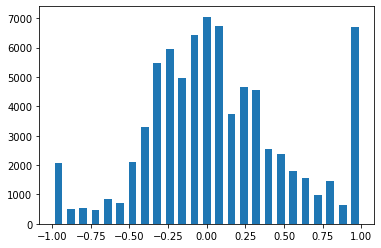

In [16]:
#Plot Throttle
hist, bins = np.histogram(throttle, num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)

In [17]:
#Split the dataset
train = train_data[:-round(len(train_data)*0.20)] 
test = train_data[-round(len(train_data)*0.20):]
print("train: ", train.shape)
print("test: ", test.shape)


X = np.array([i[0] for i in train]).reshape(-1,WIDTH,HEIGHT,1)
Y = np.array([i[1] for i in train])

test_x = np.array([i[0] for i in test]).reshape(-1,WIDTH,HEIGHT,1)
test_y = np.array([i[1] for i in test])

train:  (62474, 2)
test:  (15618, 2)


In [18]:
#Image augmentation used to generalize the performance of the model
def zoom(image):
  zoom_img = iaa.Affine(scale = (1, 1.3))
  image = zoom_img.augment_image(image)
  return image

Text(0.5, 1.0, 'Zoomed Image')

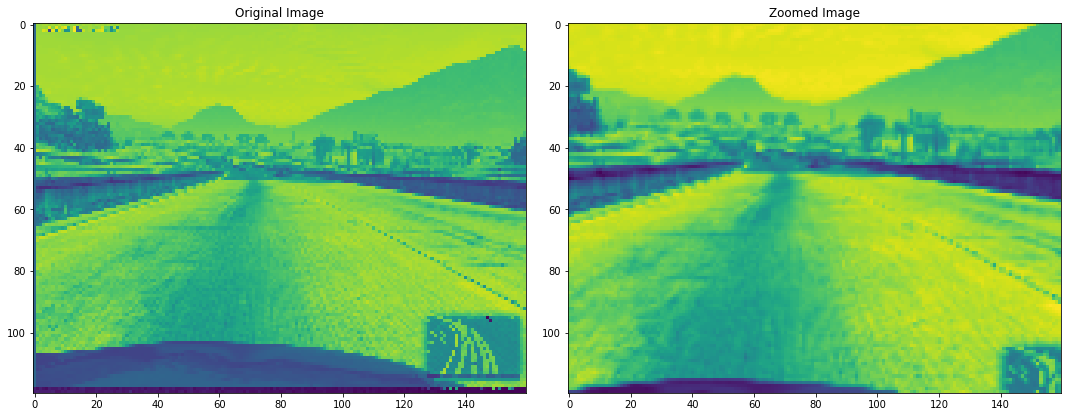

In [19]:
image, choice = train [random.randint(0,len(train)-1)]
zoomed_image = zoom(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')


In [20]:
def pan(image):
  pan = iaa.Affine(translate_percent={'x': (-0.1, 0.1), 'y': (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

Text(0.5, 1.0, 'Panned Image')

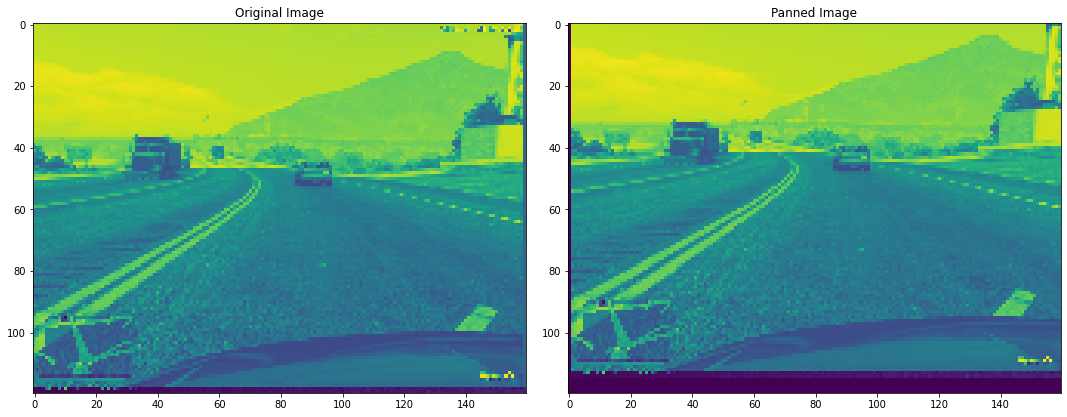

In [21]:
image, choice = train [random.randint(0,len(train)-1)]
#original_image = npimg.imread(image)
panned_image = pan(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

In [22]:
def img_random_brightness(image):
  brightness = iaa.Multiply((0.2, 1.2))
  image = brightness.augment_image(image)
  return image

Text(0.5, 1.0, 'bright_image')

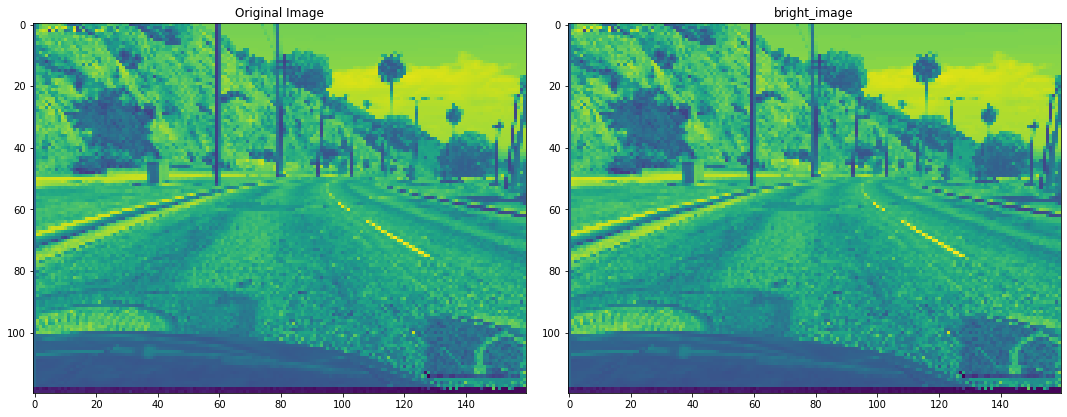

In [23]:
image, choice = train_data [random.randint(0,len(train_data)-1)]
bright_image = img_random_brightness(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')

axs[1].imshow(bright_image)
axs[1].set_title('bright_image')

In [24]:
def img_random_flip(image, choice):
  image = cv2.flip(image, 1)
  steering=choice[0]
  throttle=choice[1]
  steering = -steering
  new_choice = [steering, throttle]
  return image, new_choice

actual steering angle =  -0.18865966796875
flipped steering angle =  0.18865966796875


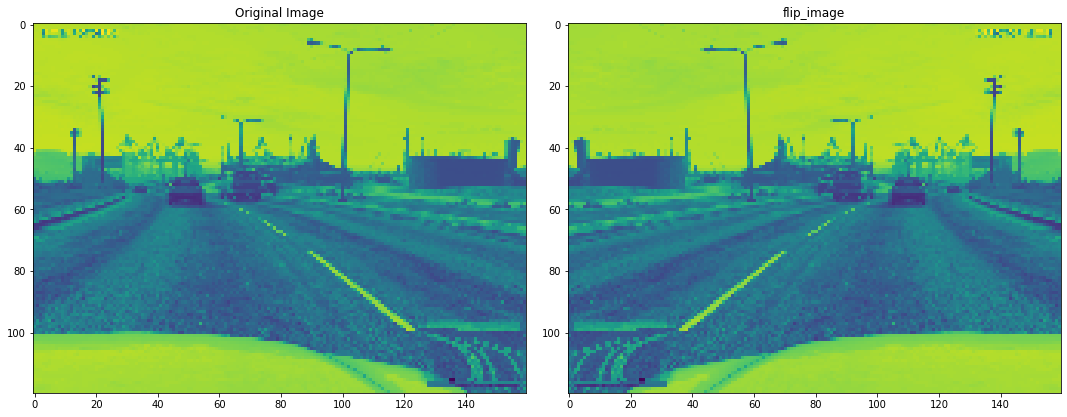

In [25]:
image, choice = train_data [random.randint(0,len(train_data)-1)]
flip_image, flip_choice = img_random_flip(image, choice)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')

axs[1].imshow(flip_image)
axs[1].set_title('flip_image')

print ("actual steering angle = ", choice [0])
print ("flipped steering angle = ", flip_choice [0])
#print (choice)
#print (flip_choice)

In [26]:
def random_augment(image, choice):
    #image = npimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, choice = img_random_flip(image, choice)
    
    return image, choice

Text(0.5, 1.0, 'Random Augmented Image')

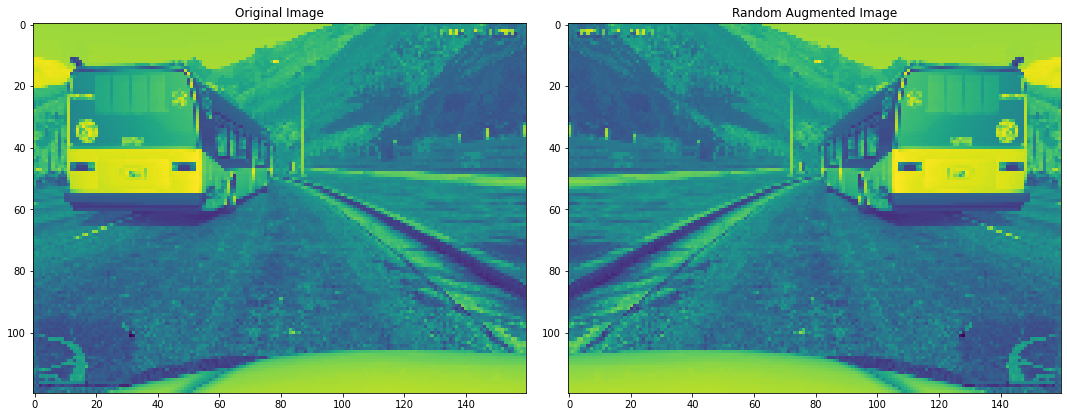

In [27]:
image, choice = train_data [random.randint(0,len(train_data)-1)]
random_augmented_image, augmented_choice = random_augment(image, choice)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image) #cmap='gray'
axs[0].set_title('Original Image')

axs[1].imshow(random_augmented_image) #cmap='gray'
axs[1].set_title('Random Augmented Image')

In [28]:
def batch_generator(train_data_to_generate, batch_size, istraining):
  while True:
    batch_img = []
    batch_ch = []

    for i in range(batch_size):
      random_index = random.randint(0, len(train_data_to_generate)-1)
      image, choice = train_data_to_generate[random_index]

      if istraining:
        im, ch= random_augment(image, choice)
        #ch = choice
      else:
        im = image
        ch = choice
      
      im = im.reshape(WIDTH,HEIGHT,1)

      batch_img.append(im)
      batch_ch.append(ch)
    yield (np.asarray(batch_img), np.asarray(batch_ch))

In [29]:
def nvidia_modified():
  model = Sequential()

  #1st layer
  model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(WIDTH, HEIGHT,1),activation='elu'))

  #2nd layer
  model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))

  #3rd layer
  model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
  
  #4th layer
  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))

  #5th layer
  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))


  #1st Dense Layer
  model.add(Flatten())
  model.add(Dense(100, activation='elu'))
  #model.add(Dropout(0.5))

  #2nd Dense Layer
  model.add(Dense(50, activation='elu'))
  #model.add(Dropout(0.5))

  #3rd Dense Layer
  model.add(Dense(10, activation='elu'))
  #model.add(Dropout(0.5))

  #output
  model.add(Dense(2))
  
  #Compile model
  model.compile(Adam(lr=0.001), loss = 'mse', metrics = ['accuracy'])
  return model

In [30]:
model = nvidia_modified() #72-73% accuracy
print (model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 78, 58, 24)        624       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 27, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 12, 48)        43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 10, 64)        27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 8, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 6656)              0         
_______________________________________

In [ ]:

history = model.fit_generator(batch_generator(train,300,1),
                              steps_per_epoch = 100, #150 without crop
                              epochs = 25,
                              validation_data = batch_generator(test, 100, 0),
                              validation_steps = 50,
                              verbose = 1, 
                              shuffle=1)

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
img_testing, choice_testing = test [random.randint(0,len(test)-1)]
plt.imshow(img_testing)
print ("Actual: ", choice_testing)
img_testing = img_testing.reshape(-1,WIDTH,HEIGHT,1)

print ("Prediction: ", model.predict(img_testing))

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['traning', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_x, test_y, batch_size=10)
print("test loss, test acc:", results)

In [ ]:
model.save('steer.h5')